<a href="https://colab.research.google.com/github/fausiahms/Machine-Learning/blob/main/Tugas_Pre_Processing_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
dt=pd.read_xlsx('/content/Metadata.xlsx')

AttributeError: ignored

In [ ]:
#Memanggil Data
dt

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86
...,...,...,...,...,...,...,...,...
995,male,group C,some college,standard,none,77,77,71
996,male,group C,some college,standard,none,80,66,66
997,female,group A,high school,standard,completed,67,86,86
998,male,group E,high school,standard,none,80,72,62


In [ ]:
#Banyaknya baris dan kolom
dt.shape

(1000, 8)

In [ ]:
#Melihat n data teratas
dt.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86


In [ ]:
#Melihat n data terbawah
dt.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,male,group C,some college,standard,none,77,77,71
996,male,group C,some college,standard,none,80,66,66
997,female,group A,high school,standard,completed,67,86,86
998,male,group E,high school,standard,none,80,72,62
999,male,group D,high school,standard,none,58,47,45


In [ ]:
#Statistika Deskriptif data
dt.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,67.810000,70.382000,69.140000
std,15.250196,14.107413,15.025917
min,15.000000,25.000000,15.000000
25%,58.000000,61.000000,59.000000
50%,68.000000,70.500000,70.000000
75%,79.250000,80.000000,80.000000
max,100.000000,100.000000,100.000000


In [ ]:
#Menunjukkan tipe data
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
#Untuk Menemukan data
dt.iloc[898]

gender                                 male
race/ethnicity                      group C
parental level of education    some college
lunch                              standard
test preparation course                none
math score                               76
reading score                            65
writing score                            58
Name: 898, dtype: object

In [ ]:
dt.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [ ]:
#Mengecek Banyak Kolom yang kosong
dt.columns[dt.isnull().any()]

Index([], dtype='object')

In [ ]:
#Mengecek Banyaknya baris kosong tiap indikator
dt.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [ ]:
#Mengecek indikator banyaknya data sesuai klasifikasinya
dt['gender'].value_counts()

male      508
female    492
Name: gender, dtype: int64

In [ ]:
import seaborn as sns

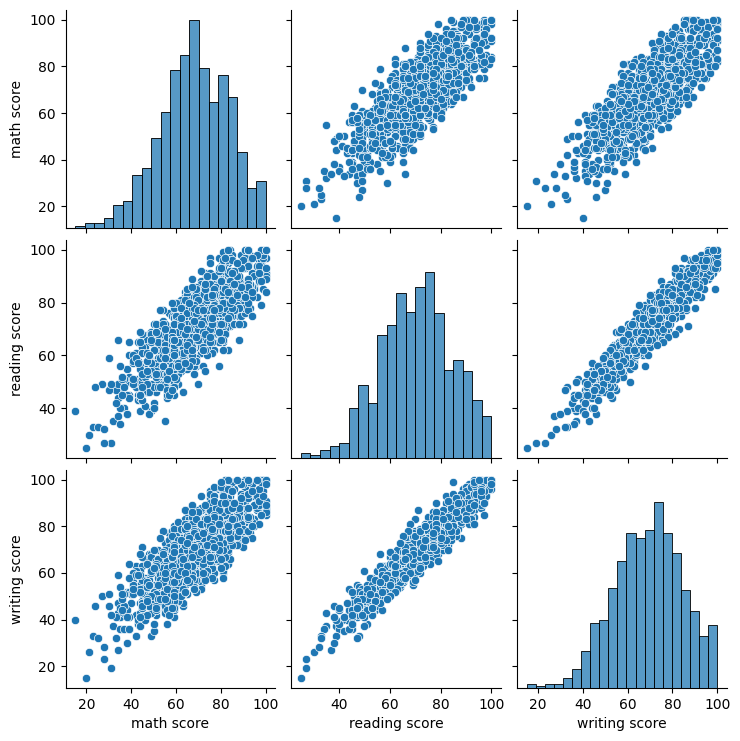

In [ ]:
sns.pairplot(dt)

<ipython-input-35-e2218bf544e4>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dt.corr())


<Axes: >

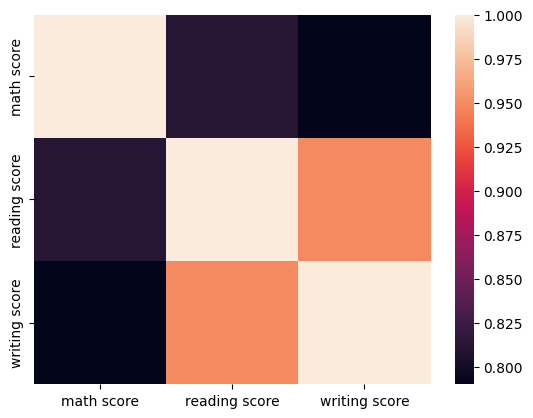

In [ ]:
sns.heatmap(dt.corr())

In [ ]:
#Menghapus data kosong sesuai indikator (Note : data exam tidak ada yang perlu dihapus)
dt['gender']=dt['gender'].fillna(dt['gender'].mode()[0])

In [ ]:
#Untuk menemukan data
dt[dt['gender'].index==898]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
898,1,2,4,1,1,76,65,58


In [ ]:
#Jika suatu indikator memiliki banyak missing value, maka hapus
#Contoh jika lunch punya missing value yang banyak, maka cara hapusnya :
dt = dt.drop(['lunch'], axis = 1)

In [ ]:
#Membagi datatest dan datatrain
import random
import numpy as np

random.seed(123)
n = len(dt['gender']) # total baris
label = np.random.choice([1, 2], size=(n), p=[0.8,0.2]) # membangkitkan data 0 dan 1 sebanyak n kali dengan proporsi 80%,20%

# split data
dt_train = dt.loc[label==1,]
dt_test = dt.loc[label==2,]

In [ ]:
dt_train

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86
5,male,group C,some high school,standard,none,68,57,54
...,...,...,...,...,...,...,...,...
994,female,group B,associate's degree,standard,none,82,97,90
995,male,group C,some college,standard,none,77,77,71
996,male,group C,some college,standard,none,80,66,66
997,female,group A,high school,standard,completed,67,86,86


In [ ]:
dt_test

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
1,male,group D,associate's degree,standard,none,96,93,87
3,male,group B,some college,free/reduced,none,70,70,63
7,female,group B,some high school,standard,none,46,61,58
9,female,group C,bachelor's degree,standard,completed,57,69,77
16,female,group C,some college,free/reduced,none,35,47,41
...,...,...,...,...,...,...,...,...
988,male,group D,some high school,standard,none,51,53,45
989,male,group D,associate's degree,standard,completed,67,62,67
993,male,group D,some high school,standard,none,83,74,80
997,female,group A,high school,standard,completed,67,86,86


In [ ]:
#Converting Data Kategorik menjadi Numerik
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
dt['gender'] = labelencoder.fit_transform(dt['gender'])
dt['race/ethnicity'] = labelencoder.fit_transform(dt['race/ethnicity'])
dt['parental level of education'] = labelencoder.fit_transform(dt['parental level of education'])
dt['lunch'] = labelencoder.fit_transform(dt['lunch'])
dt['test preparation course'] = labelencoder.fit_transform(dt['test preparation course'])

In [ ]:
#Melihat konversi male dan female menjadi numerik
dt['gender']

0      0
1      1
2      0
3      1
4      0
      ..
995    1
996    1
997    0
998    1
999    1
Name: gender, Length: 1000, dtype: int64

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dt_train['gender'].value_counts()

male      412
female    408
Name: gender, dtype: int64

In [ ]:
dt

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,3,4,1,0,59,70,78
1,1,3,0,1,1,96,93,87
2,0,3,4,0,1,57,76,77
3,1,1,4,0,1,70,70,63
4,0,3,0,1,1,83,85,86
...,...,...,...,...,...,...,...,...
995,1,2,4,1,1,77,77,71
996,1,2,4,1,1,80,66,66
997,0,0,2,1,0,67,86,86
998,1,4,2,1,1,80,72,62


In [ ]:
# Importing Classifier Modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
dt_train.shape, dt_test.shape

((770, 8), (230, 8))

In [ ]:
dt_train.shape

(820, 8)

In [ ]:
train_data = dt_train.drop("gender",axis = 1 )
target = dt_train['gender']

In [ ]:
test_data = dt_test.drop("gender",axis = 1 )
target = dt_test['gender']

In [ ]:
k_fold = KFold(n_splits=8 , shuffle=True, random_state=0)

clf = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

ValueError: ignored